In [3]:
import pandas as pd 
df = pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

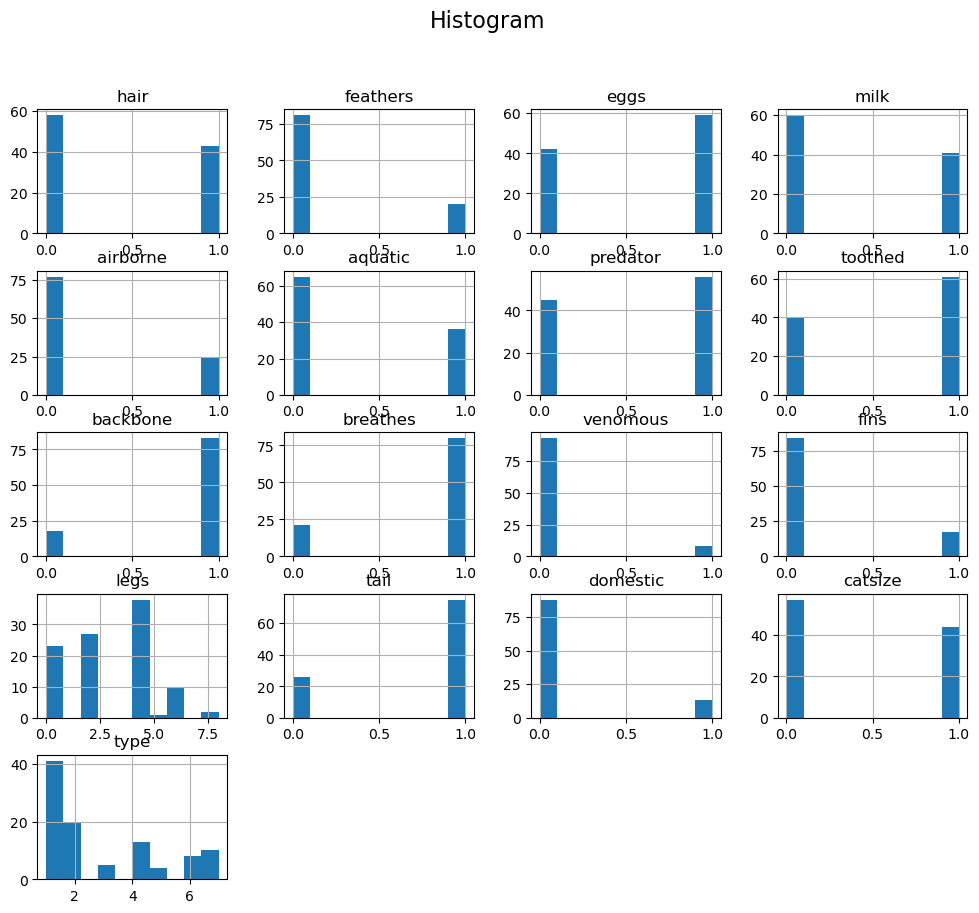

In [11]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(figsize=(12, 10))
plt.suptitle("Histogram", fontsize=16)
plt.show()

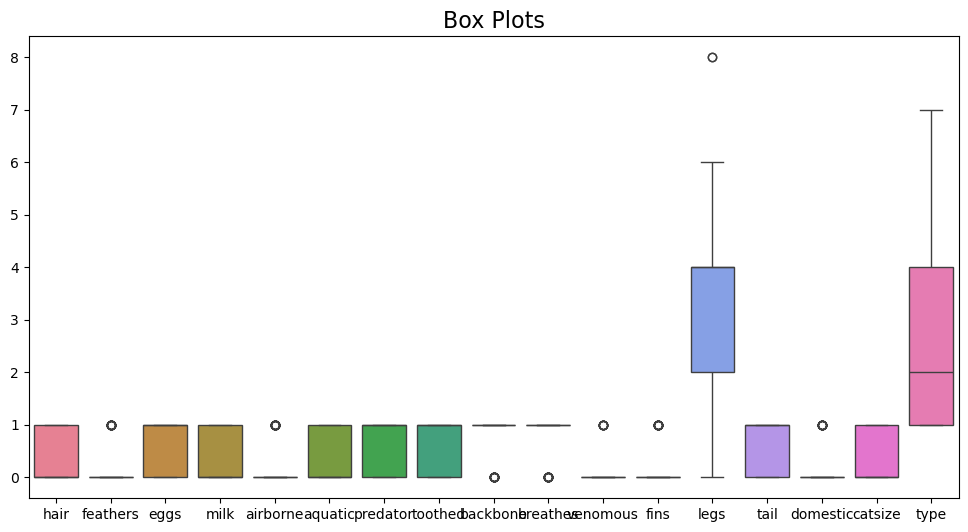

In [12]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plots", fontsize=16)
plt.show()

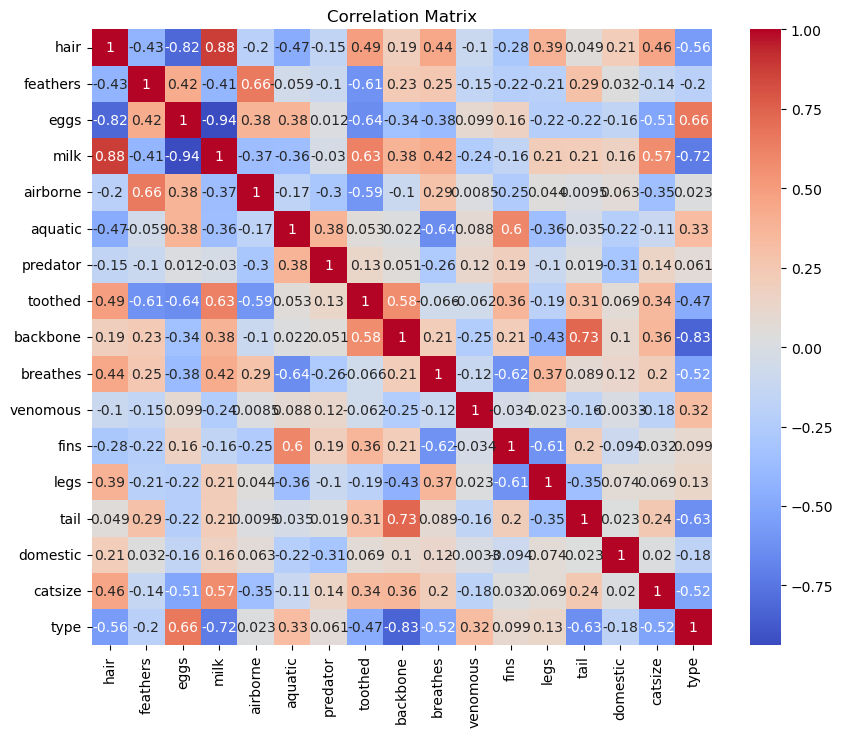

In [14]:
# Correlation Matrix 
corr_matrix = df.corr(numeric_only=True) 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [15]:
# Data Preprocessing

Y = df['type']  
X = df.drop('type', axis=1)

In [17]:
num_col = X.select_dtypes(include=['float', 'int']).columns  # Numerical Variables
cat_col = X.select_dtypes(include=['object']).columns  # Categorical Variables

In [18]:
# Apply the OneHot Encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
dummy = OHE.fit_transform(X[cat_col])
data_df = pd.DataFrame(dummy, columns=OHE.get_feature_names_out(cat_col))
X = X.drop(cat_col, axis=1)  # Drop original categorical columns
X = pd.concat([X, data_df], axis=1) 

In [19]:
# Apply the StandardScaler
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal name_tuatara,animal name_tuna,animal name_vampire,animal name_vole,animal name_vulture,animal name_wallaby,animal name_wasp,animal name_wolf,animal name_worm,animal name_wren
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Split the model X & Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
# Model fitting
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [22]:
model.fit(X_train.values, Y_train)
Y_pred_train = model.predict(X_train.values)
Y_pred_test  = model.predict(X_test.values)

In [23]:
# Evaluate the Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, Y_pred_test)
precision = precision_score(Y_test, Y_pred_test, average='weighted')
recall = recall_score(Y_test, Y_pred_test, average='weighted')
f1 = f1_score(Y_test, Y_pred_test, average='weighted')

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-score: 0.9333333333333333


C:\Users\Abhishek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Cross Validation
training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=i)
    model.fit(X_train.values,Y_train)
    Y_pred_train = model.predict(X_train.values)
    Y_pred_test  = model.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 0.95
Cross validation - Test accuracy: 0.89


In [30]:
#  Hyperparameter Tuning
training_accuracy_list = []
test_accuracy_list = []

for k in range(5, 18, 2):
    training_accuracy = []
    test_accuracy = []

    for i in range(1, 100, 1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train.values, Y_train)
        y_pred_train = knn.predict(X_train.values)
        y_pred_test = knn.predict(X_test.values)
        training_accuracy.append(accuracy_score(Y_train, y_pred_train))
        test_accuracy.append(accuracy_score(Y_test, y_pred_test))

    training_accuracy_list.append(np.mean(training_accuracy).round(2))
    test_accuracy_list.append(np.mean(test_accuracy).round(2))

print("Training Accuracies:", training_accuracy_list)
print("Test Accuracies:", test_accuracy_list)




Training Accuracies: [0.95, 0.92, 0.89, 0.88, 0.87, 0.86, 0.85]
Test Accuracies: [0.89, 0.84, 0.83, 0.83, 0.82, 0.81, 0.79]


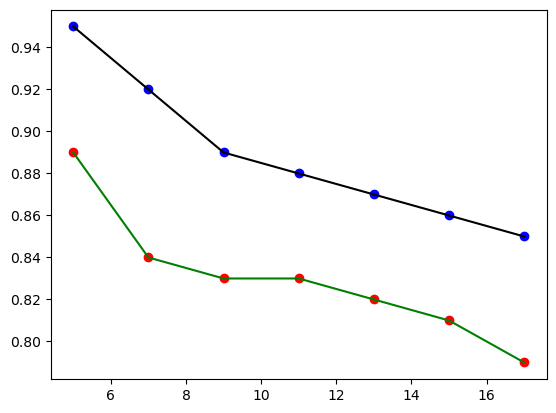

In [32]:
# Visualize the Results
import matplotlib.pyplot as plt
plt.scatter(range(5, 18, 2),training_accuracy_list,color='blue')
plt.plot(range(5, 18, 2),training_accuracy_list,color='black')
plt.scatter(range(5, 18, 2),test_accuracy_list,color='red')
plt.plot(range(5, 18, 2),test_accuracy_list,color='Green')
plt.show()